# KNN Supervized Classifier to predict the type of Flower in Iris Data set

In [54]:
# Import Libraries
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
# load the iris dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#from sklearn.externals import joblib
import joblib

In [62]:
# Load the sample data set
iris = load_iris()
# store the X-feature matrix and y-response vector
X = iris.data
y = iris.target

# splitting X and y into training and testing data sets in 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# training the model on training set
knn = KNeighborsClassifier(n_neighbors= 2 , weights = 'distance')
knn.fit(X_train, y_train)

# Enable predictions on the testing data set
y_pred = knn.predict(X_test)

# Verify Actual target values- y_test with predicted values - y_pred
print("kNN model's accuracy is:", metrics.accuracy_score(y_test, y_pred))

# making prediction for out of sample data
sample = [[3, 5, 4, 2], [6, 4, 8, 9]]
preds = knn.predict(sample)
pred_species = [iris.target_names[pred] for pred in preds]
print("Predicted targets:", pred_species)

# saving the model to a pkl file
joblib.dump(knn, 'iris_knn.pkl')


kNN model's accuracy is: 0.9777777777777777
Predicted targets: ['virginica', 'virginica']


['iris_knn.pkl']

# Evaluate Performance of kNN Model

In [56]:
# predisted accuracy score

predicted_labels = knn.predict(X_test)
knn.score(X_test, y_test)

0.9777777777777777

Confusion Matrix
['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica', 'setosa', 'setosa', 'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica', 'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica', 'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor']


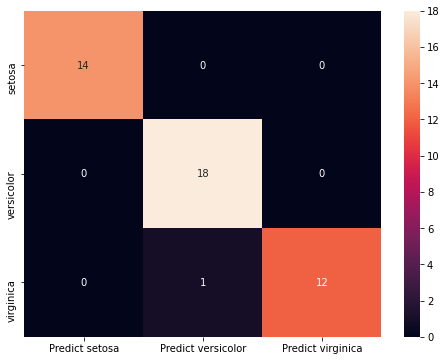

In [57]:
#print(iris.target_names[y])

# calculate accuracy measures and confusion matrix
print("Confusion Matrix")
pred_species_l = [iris.target_names[pred_l] for pred_l in predicted_labels]
print(pred_species_l)
y_species_l = [iris.target_names[y_l] for y_l in y_test]
cm=metrics.confusion_matrix(y_species_l, pred_species_l, labels=['setosa','versicolor','virginica'])

df_cm = pd.DataFrame(cm, index = [i for i in ['setosa','versicolor','virginica']],
                  columns = [i for i in ["Predict setosa","Predict versicolor","Predict virginica"]])
plt.figure(figsize = (8,6))
sns.heatmap(df_cm, annot=True)